In [2]:
from tensorflow.keras.utils import to_categorical

In [3]:
 ! pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=3f37ba40589823b8197fe754188dd7f63911adec0de085845e61094107ecacaf
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [4]:
!pip install keras

In [5]:
!pip install tensorflow

In [6]:
from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

In [8]:
# Load the data
try:
    train = pd.read_csv('/content/drive/MyDrive/Digit Recognizer22/train.csv/train.csv')
    test = pd.read_csv('/content/drive/MyDrive/Digit Recognizer22/test.csv/test.csv')
except Exception as e:
    print(e)  # Print the error message

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


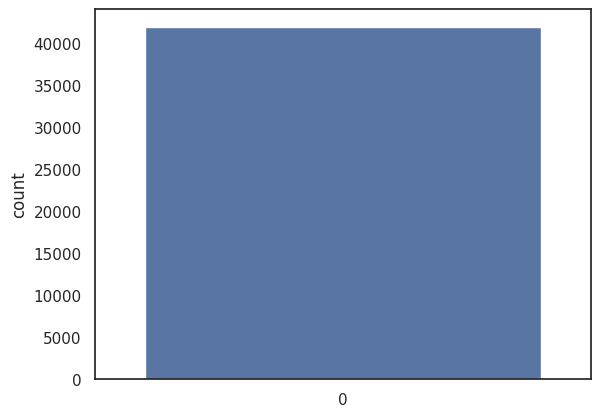

In [42]:
import pandas as pd  # Import pandas if needed for DataFrame operations
import seaborn as sns

# Load or create the DataFrame (replace with your actual data loading code)
train = pd.read_csv("/content/drive/MyDrive/Digit Recognizer22/train.csv/train.csv")  # Example using pandas to load data

Y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)

# Print value counts before deleting train
print(Y_train.value_counts())

# Create the countplot
g = sns.countplot(Y_train)
Y_train.value_counts()
# Free up space (optional)
del train

In [10]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [11]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [12]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [13]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [14]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [15]:
# Set the random seed
random_seed = 5

In [16]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

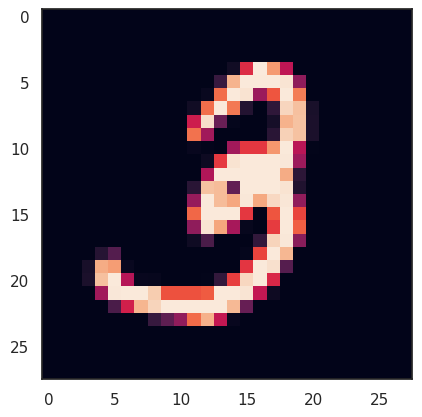

In [17]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [18]:
# Set the CNN model
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [19]:
# Define the optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

In [20]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [21]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [22]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [23]:


datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)


datagen.fit(X_train)

In [24]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = 20,
                              validation_data = (X_val,Y_val),
                              verbose = 2,
                              steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/20
439/439 - 272s - loss: 0.4203 - accuracy: 0.8654 - val_loss: 0.0590 - val_accuracy: 0.9826 - lr: 0.0010 - 272s/epoch - 620ms/step
Epoch 2/20
439/439 - 279s - loss: 0.1295 - accuracy: 0.9622 - val_loss: 0.0369 - val_accuracy: 0.9900 - lr: 0.0010 - 279s/epoch - 636ms/step
Epoch 3/20
439/439 - 272s - loss: 0.0946 - accuracy: 0.9721 - val_loss: 0.0444 - val_accuracy: 0.9876 - lr: 0.0010 - 272s/epoch - 620ms/step
Epoch 4/20
439/439 - 271s - loss: 0.0775 - accuracy: 0.9771 - val_loss: 0.0346 - val_accuracy: 0.9912 - lr: 0.0010 - 271s/epoch - 617ms/step
Epoch 5/20
439/439 - 265s - loss: 0.0678 - accuracy: 0.9798 - val_loss: 0.0321 - val_accuracy: 0.9893 - lr: 0.0010 - 265s/epoch - 604ms/step
Epoch 6/20
439/439 - 267s - loss: 0.0630 - accuracy: 0.9817 - val_loss: 0.0372 - val_accuracy: 0.9905 - lr: 0.0010 - 267s/epoch - 608ms/step
Epoch 7/20
439/439 - 265s - loss: 0.0582 - accuracy: 0.9829 - val_loss: 0.0291 - val_accuracy: 0.9929 - lr: 0.0010 - 265s/epoch - 605ms/step
Epoch 8/20
43

 Training and validation curves

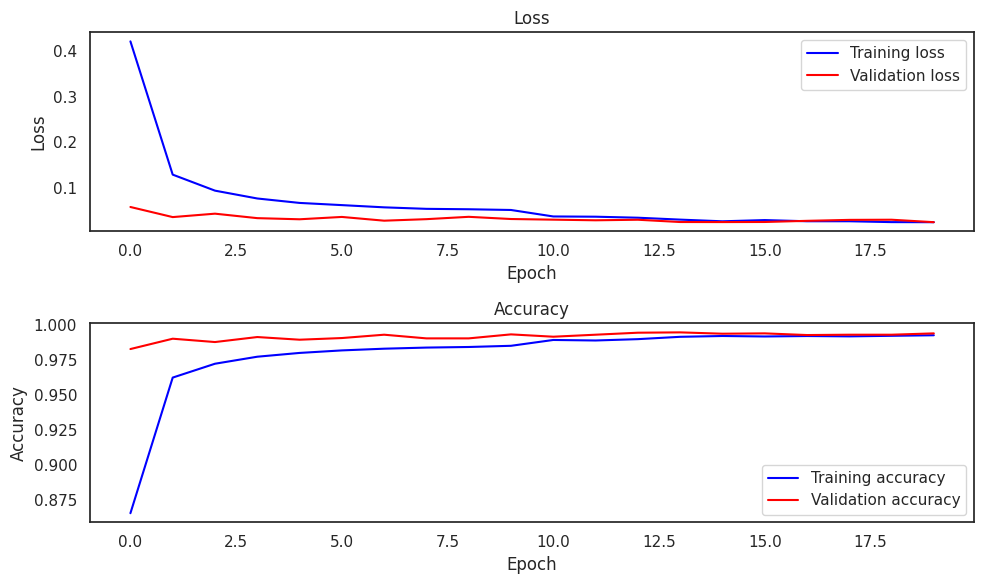

In [25]:
# Plot the loss and accuracy curves for training and validation
import matplotlib.pyplot as plt

# Create a figure and a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot training and validation loss on the first subplot
ax1.plot(history.history['loss'], color='blue', label='Training loss')
ax1.plot(history.history['val_loss'], color='red', label='Validation loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')

# Plot training and validation accuracy on the second subplot
ax2.plot(history.history['accuracy'], color='blue', label='Training accuracy')
ax2.plot(history.history['val_accuracy'], color='red', label='Validation accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')

# Adjust layout and spacing
plt.tight_layout()
plt.show()

Confusion matrix

132/132 [==============================] - 9s 70ms/step


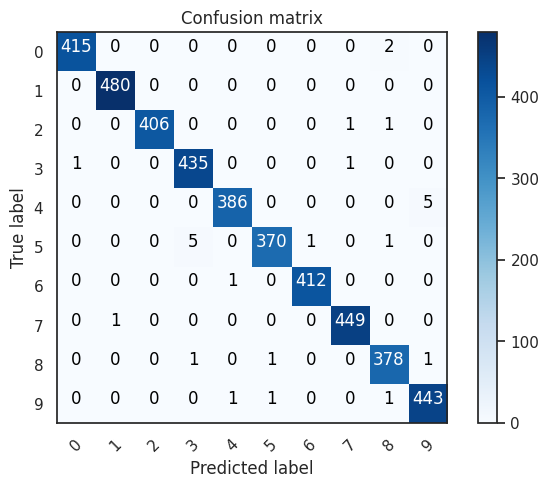

In [27]:
# Look at confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

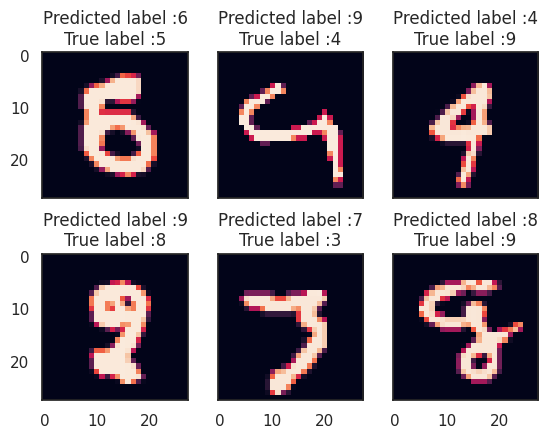

In [28]:
# Display some error results

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [29]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 52s 59ms/step


In [30]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)